# Libraries

In [20]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [35]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [36]:
IMAGE_SIZE = [224, 224]

train_path = 'PycharmProjects/train/covid'
valid_path = 'PycharmProjects/train/normal'

In [37]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 153s 2us/step


In [43]:
mobilnet

In [45]:
for layer in mobilnet.layers:
    layer.trainable = False

In [51]:
folders = glob('PycharmProjects/train/*')

In [52]:
folders

['PycharmProjects/train\\covid', 'PycharmProjects/train\\normal']

In [53]:
x = Flatten()(mobilnet.output)

In [54]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [55]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [56]:
from tensorflow.keras.layers import MaxPooling2D


In [57]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [58]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [63]:
training_set = train_datagen.flow_from_directory('PycharmProjects/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 302 images belonging to 2 classes.


In [64]:
training_set

In [66]:
test_set = test_datagen.flow_from_directory('PycharmProjects/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 302 images belonging to 2 classes.


In [68]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Charan\AppData\Local\Temp/ipykernel_14240/1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
10/10 [==============================] - 65s 6s/step - loss: 1.7935 - accuracy: 0.6556 - val_loss: 0.2755 - val_accuracy: 0.9172
Epoch 2/50
10/10 [==============================] - 53s 6s/step - loss: 0.3811 - accuracy: 0.8146 - val_loss: 0.2720 - val_accuracy: 0.9437
Epoch 3/50
10/10 [==============================] - 56s 6s/step - loss: 0.2307 - accuracy: 0.9238 - val_loss: 0.1077 - val_accuracy: 0.9570
Epoch 4/50
10/10 [==============================] - 55s 6s/step - loss: 0.1804 - accuracy: 0.9371 - val_loss: 0.0716 - val_accuracy: 0.9768
Epoch 5/50
10/10 [==============================] - 58s 6s/step - loss: 0.1208 - accuracy: 0.9404 - val_loss: 0.0905 - val_accuracy: 0.9735
Epoch 6/50
10/10 [==============================] - 61s 6s/step - loss: 0.0833 - accuracy: 0.9702 - val_loss: 0.0561 - val_accuracy: 0.9834
Epoch 7/50
10/10 [==============================] - 65s 7s/step - loss: 0.0896 - accuracy: 0.9669 - val_loss: 0.0669 - val_accuracy: 0.9768
Epoch 8/50
10/10 [==

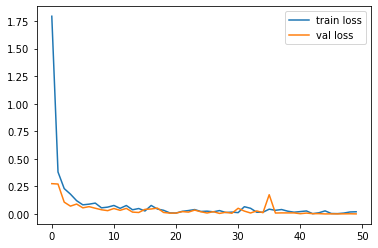

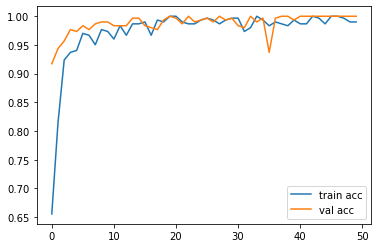

<Figure size 432x288 with 0 Axes>

In [69]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [80]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [78]:
y_pred = model.predict(test_set)
y_pred

array([[9.99979138e-01, 2.08427136e-05],
       [9.99860048e-01, 1.39897282e-04],
       [9.98961806e-01, 1.03816902e-03],
       [9.99486804e-01, 5.13189880e-04],
       [1.04423620e-04, 9.99895573e-01],
       [9.99836922e-01, 1.62996512e-04],
       [9.97713089e-01, 2.28692079e-03],
       [9.98843670e-01, 1.15636073e-03],
       [9.99999166e-01, 8.67925507e-07],
       [9.99779046e-01, 2.21018170e-04],
       [7.80194114e-06, 9.99992251e-01],
       [8.96722577e-06, 9.99991059e-01],
       [3.22405214e-07, 9.99999642e-01],
       [3.39357848e-06, 9.99996662e-01],
       [5.73749276e-07, 9.99999404e-01],
       [9.99987125e-01, 1.28845841e-05],
       [9.99951720e-01, 4.83012700e-05],
       [1.80768511e-05, 9.99981880e-01],
       [1.70449516e-06, 9.99998331e-01],
       [8.33383584e-10, 1.00000000e+00],
       [2.01629859e-07, 9.99999762e-01],
       [1.56962597e-06, 9.99998450e-01],
       [9.33928004e-06, 9.99990702e-01],
       [9.99932528e-01, 6.74464754e-05],
       [9.999970

In [79]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [81]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [82]:
model=load_model('model_vgg19.h5')

In [87]:
img=image.load_img('PycharmProjects/train/covid/covid/x.jpeg',target_size=(224,224))

In [88]:
x=image.img_to_array(img)
x

array([[[133., 133., 133.],
        [121., 121., 121.],
        [115., 115., 115.],
        ...,
        [133., 133., 133.],
        [132., 132., 132.],
        [254., 254., 254.]],

       [[109., 109., 109.],
        [ 95.,  95.,  95.],
        [ 89.,  89.,  89.],
        ...,
        [128., 128., 128.],
        [124., 124., 124.],
        [254., 254., 254.]],

       [[ 56.,  56.,  56.],
        [ 46.,  46.,  46.],
        [ 48.,  48.,  48.],
        ...,
        [123., 123., 123.],
        [116., 116., 116.],
        [254., 254., 254.]],

       ...,

       [[247., 247., 247.],
        [243., 243., 243.],
        [242., 242., 242.],
        ...,
        [215., 215., 215.],
        [209., 209., 209.],
        [254., 254., 254.]],

       [[246., 246., 246.],
        [243., 243., 243.],
        [242., 242., 242.],
        ...,
        [216., 216., 216.],
        [214., 214., 214.],
        [254., 254., 254.]],

       [[245., 245., 245.],
        [243., 243., 243.],
        [242., 2

In [89]:
x.shape

(224, 224, 3)

In [90]:
x=x/255

In [91]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [92]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [93]:
a=np.argmax(model.predict(img_data), axis=1)

In [94]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")


Infected
